# **Assignment 3 - Ei Kay Khine**

### **Dataset Overview**
This dataset contains information about social media posts across three platforms: **Facebook**, **Instagram**, and **Twitter**. Each row represents a single post, and the columns provide details about the post's engagement, type, timing, and sentiment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('social_media_engagement.csv')

df.head()

,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
0,1,Facebook,image,2023-08-17 14:45,Best day ever! 🎉,#Social,2121,474,628,16,1,14,Thursday,positive
1,2,Facebook,carousel,2023-05-14 00:45,Here's a quick update.,"#Family, #Community, #Events",3660,432,694,22,3,0,Sunday,neutral
2,3,Instagram,poll,2023-02-21 16:15,Not my best day. 😞,"#Beauty, #Fashion, #InstaDaily",4955,408,688,18,3,16,Tuesday,negative
3,4,Twitter,image,2023-11-16 00:45,Disappointed but moving on.,"#Trending, #Tech, #Entertainment",1183,90,187,27,3,0,Thursday,negative
4,5,Twitter,video,2023-05-23 00:30,Exciting news! 🚀,"#News, #Politics, #Entertainment",3499,247,286,16,3,0,Tuesday,positive


# **Summary Statistics**

In [2]:
df.describe(include = "all").round(2)


,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
count,1000.00,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000,1000
unique,NaN,3,5,986,12,400,NaN,NaN,NaN,NaN,NaN,NaN,7,3
top,NaN,Instagram,poll,2023-09-20 13:30,Loving this new vibe! 😍,#Tech,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,positive
freq,NaN,345,212,2,93,34,NaN,NaN,NaN,NaN,NaN,NaN,155,343
mean,500.50,NaN,NaN,NaN,NaN,NaN,2270.05,218.25,420.81,19.70,1.99,11.05,NaN,NaN
std,288.82,NaN,NaN,NaN,NaN,NaN,1500.92,141.89,285.58,3.38,0.82,6.85,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN,0.00,10.00,0.00,16.00,1.00,0.00,NaN,NaN
25%,250.75,NaN,NaN,NaN,NaN,NaN,1016.75,97.00,185.75,17.00,1.00,5.00,NaN,NaN
50%,500.50,NaN,NaN,NaN,NaN,NaN,2047.00,186.00,375.50,18.00,2.00,11.00,NaN,NaN
75%,750.25,NaN,NaN,NaN,NaN,NaN,3453.25,327.25,654.50,23.00,3.00,17.00,NaN,NaN


In [3]:
df.isna().sum()

post_id            0
platform           0
post_type          0
post_time          0
caption            0
hashtags           0
likes              0
comments           0
shares             0
caption_length     0
num_hashtags       0
post_hour          0
post_day           0
sentiment_score    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          1000 non-null   int64 
 1   platform         1000 non-null   object
 2   post_type        1000 non-null   object
 3   post_time        1000 non-null   object
 4   caption          1000 non-null   object
 5   hashtags         1000 non-null   object
 6   likes            1000 non-null   int64 
 7   comments         1000 non-null   int64 
 8   shares           1000 non-null   int64 
 9   caption_length   1000 non-null   int64 
 10  num_hashtags     1000 non-null   int64 
 11  post_hour        1000 non-null   int64 
 12  post_day         1000 non-null   object
 13  sentiment_score  1000 non-null   object
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


### **Dataset Summaries**
- **Platform Distribution**: The dataset contains posts from three platforms. Instagram has the most posts, followed by Facebook and Twitter.
- **Post Types**: The most common post types are images and videos, while polls and carousels are less frequent.
- **Missing Values**: The dataset has no missing values in any of the columns.
- **Data Types**: The dataset contains a mix of numerical and categorical data.

# **Data Analysis**

### 1. Counts of Posts per Platform

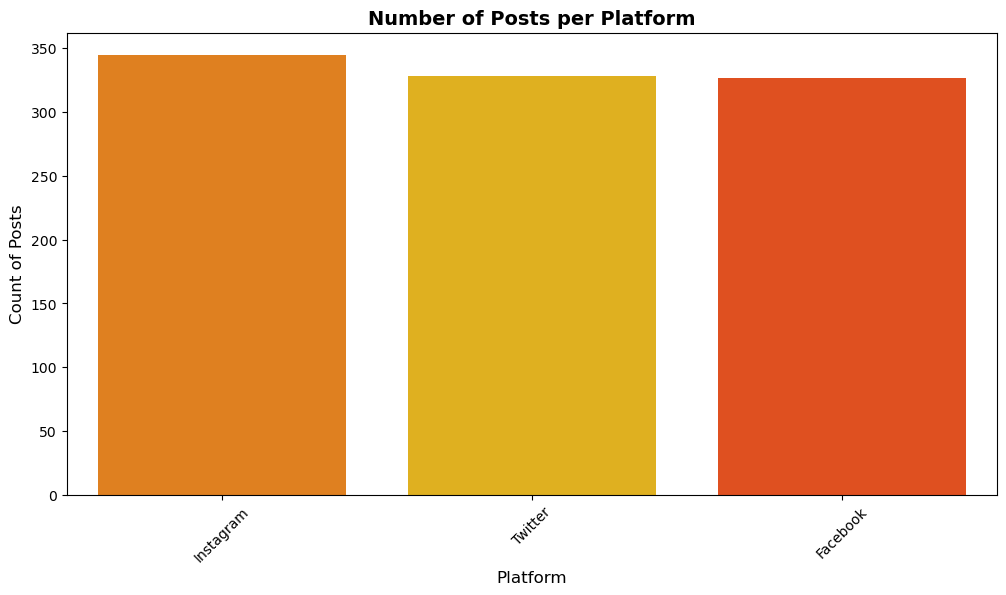

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="platform", hue="platform", order=df["platform"].value_counts().index, palette="autumn", legend=False)

plt.title("Number of Posts per Platform", fontsize=14, fontweight="bold")
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Count of Posts", fontsize=12)
plt.xticks(rotation=45)

plt.show()

**Engagement Varies by Platform**
- Instagram posts get the most likes on average.
- Facebook and Twitter tend to have fewer likes but may generate engagement through comments and shares instead.
- Possible reasons:
    - Instagram is highly visual, leading to more likes.
    - Twitter relies on text-heavy posts, which may encourage discussions rather than likes.

### 2. Post Type Analaysis 

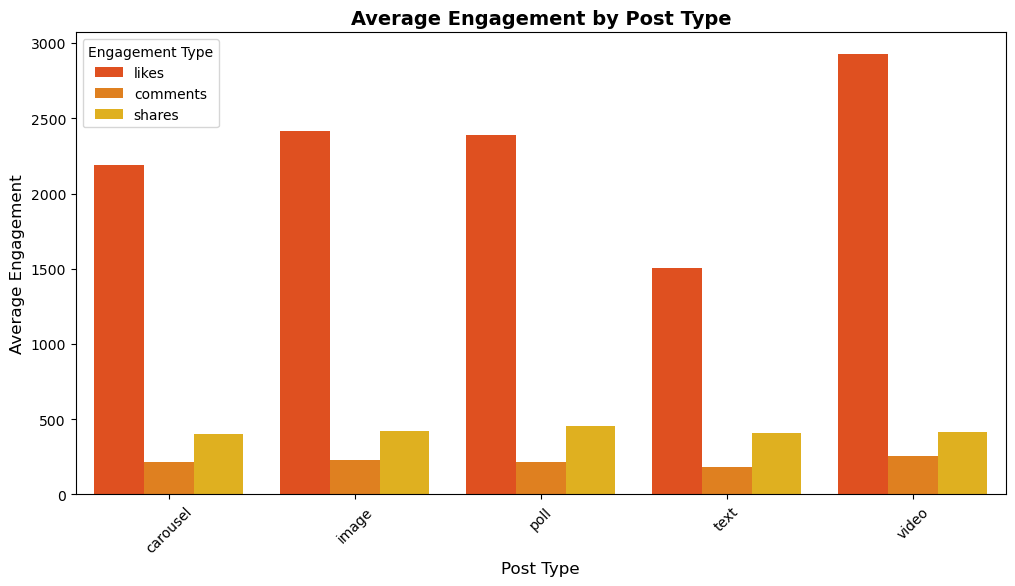

In [6]:
post_type_engagement = df.groupby("post_type")[["likes", "comments", "shares"]].mean().reset_index()
post_type_engagement_melted = post_type_engagement.melt(id_vars="post_type", var_name="Engagement Type", value_name="Average Engagement")

plt.figure(figsize=(12, 6))
sns.barplot(data=post_type_engagement_melted, x="post_type", y="Average Engagement", hue="Engagement Type", palette="autumn")

plt.title("Average Engagement by Post Type", fontsize=14, fontweight="bold")
plt.xlabel("Post Type", fontsize=12)
plt.ylabel("Average Engagement", fontsize=12)
plt.xticks(rotation=45)

plt.show()

**Engagement by Post Type**

Based on the graph, engagement depends most on likes. 
- Videos consistently outperform images and text posts in all engagement metrics (likes, comments, and shares).
- Text-based posts receive the least engagement across all categories.

- Possible reason:
    - Social media algorithms tend to boost video content, increasing visibility and engagement.
    - Users may scroll past text posts quickly without engaging. Video content holds attention longer, leading to more interactions.

### 3. Distribution of Likes per Post Type

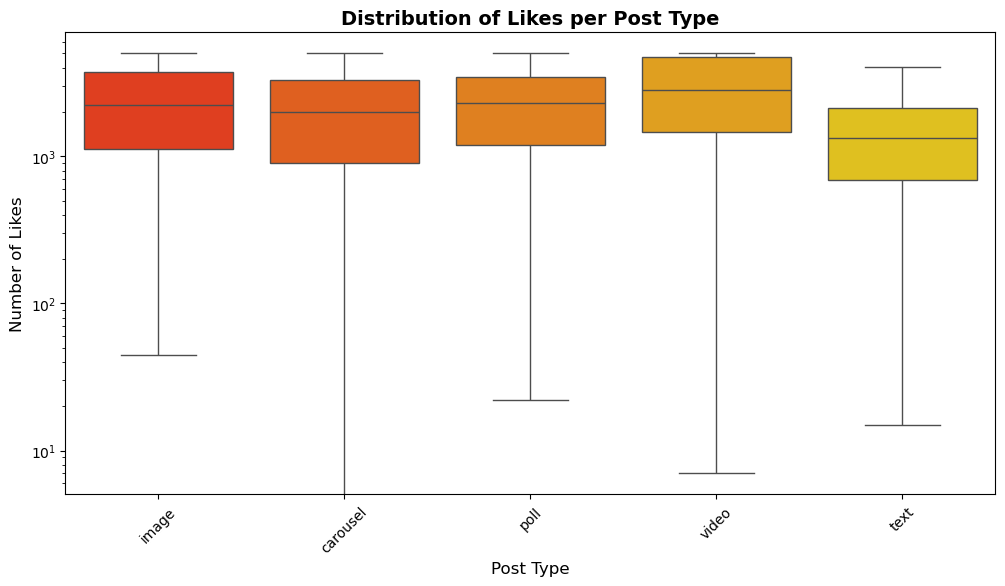

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="post_type", y="likes", hue="post_type", palette="autumn")

plt.title("Distribution of Likes per Post Type", fontsize=14, fontweight="bold")
plt.xlabel("Post Type", fontsize=12)
plt.ylabel("Number of Likes", fontsize=12)
plt.xticks(rotation=45)
plt.yscale("log") 

plt.show()

**Post Type Impacts Likes**
- Images and videos attract the highest number of likes.
- Text and polls receive fewer likes but may drive engagement through comments instead.
- Carousels (multi-image posts) also perform well, suggesting users engage more with visually appealing content.


### 4. Distrubution of Likes by Posting Hour

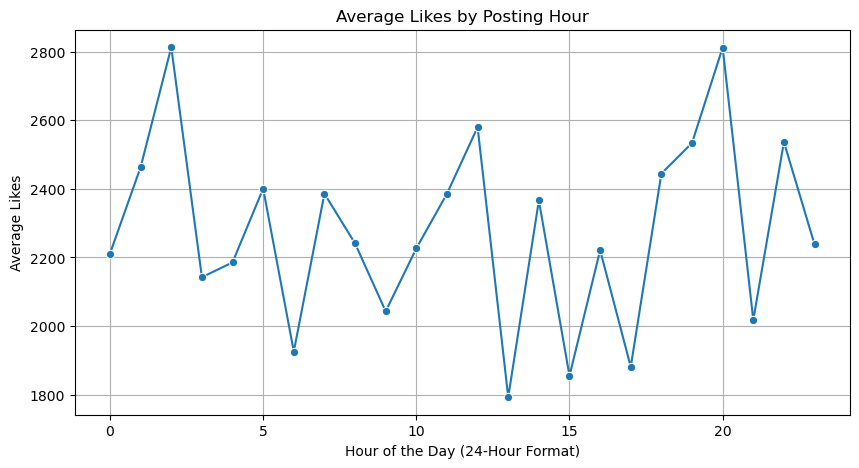

In [8]:
df['post_hour'] = df['post_hour'].astype(int)

likes_by_hour = df.groupby('post_hour')['likes'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=likes_by_hour, x='post_hour', y='likes', marker='o')
plt.title('Average Likes by Posting Hour')
plt.xlabel('Hour of the Day (24-Hour Format)')
plt.ylabel('Average Likes')
plt.grid(True)
plt.savefig("likes_by_post_hour.png")  # Save the plot
plt.show()


**Posting Hour Matters**
- There are clear peaks around late night 2am, midday 12pm, and evening 8pm. This may be due to people having free time after work and before sleep. 
- Engagement seems to drop significantly during certain hours, between 1-5pm. This may be due to people being at work or school. 

# **Conclusion**

- Instagram dominates in terms of post volume, which means engagement trends might be skewed towards this platform.
- Videos and images are the best-performing content types across likes, comments, and shares, but they also exhibit variability.
- Polls and carousels tend to have lower engagement across all metrics, making them less effective for driving interactions.
- Posting at the right times can increase visibility and engagement.

**Key Takeaway:** If you're managing social media for engagement, focus on videos and images, especially on Instagram, while being mindful of posting hours and content quality to ensure higher interaction rates.